<a href="https://colab.research.google.com/github/DeenoBajithaCode/LangGraph/blob/main/conditional_graphs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing LangGraph
This command installs the langgraph library, which allows us to build and simulate graph-based workflows in Python.

In [1]:
!pip install langgraph -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 19.0 MB/s eta 0:00:00


In [2]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph


# Step 1: Define the state

In [3]:
class NumberState(TypedDict):
    value: int
    result: str

# Step 2: Define a classifier node (decides which path to take)

In [4]:
def classify_number(state: NumberState) -> Literal["positive", "negative", "zero"]:
    num = state["value"]
    if num > 0:
        return "positive"
    elif num < 0:
        return "negative"
    else:
        return "zero"

# Step 3: Define the handler nodes

In [5]:
def handle_positive(state: NumberState) -> NumberState:
    return {**state, "result": f"{state['value']} is positive."}

def handle_negative(state: NumberState) -> NumberState:
    return {**state, "result": f"{state['value']} is negative."}

def handle_zero(state: NumberState) -> NumberState:
    return {**state, "result": f"{state['value']} is zero."}

# Step 4: Build the conditional graph

In [25]:
graph = StateGraph(NumberState)
graph.add_node("classify", lambda x: x)
graph.add_conditional_edges(
    "classify", classify_number, {
        "positive": "handle_positive",
        "negative": "handle_negative",
        "zero": "handle_zero"
    }
)


graph.add_node("handle_positive", handle_positive)
graph.add_node("handle_negative", handle_negative)
graph.add_node("handle_zero", handle_zero)

# All handlers go to END
graph.set_entry_point("classify")
graph.set_finish_point("handle_positive")
graph.set_finish_point("handle_negative")
graph.set_finish_point("handle_zero")

Step 5: compile

In [26]:
app = graph.compile()

Step 6: Visualize the graph

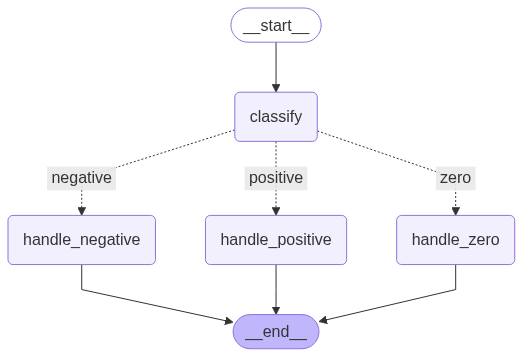

In [27]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
# Results

In [28]:
for val in [10, -7, 0]:
    input_state = {"value": val, "result": ""}
    result = app.invoke(input_state)
    print(result["result"])

10 is positive.
-7 is negative.
0 is zero.
